## Paso 1 : Importar librerias

In [96]:
import os
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Análisis de nulos
import missingno as msno

# Estadística
import scipy.stats as stats

# Configuración de warnings
warnings.filterwarnings('ignore')

## Paso 2 :Leer documentos

In [97]:
df_causa_muerte= pd.read_csv('annual_number_of_deaths_by_cause.csv')
df_esperanza=pd.read_csv('life_expectancy.csv')
df_renta_per_capita= pd.read_csv('gdp_per_capita_penn_world_table.csv')

In [98]:
df_renta_per_capita.rename(columns={'GDP per capita (output, multiple price benchmarks)':'Renta per capita'},inplace=True)

## Generamos un df_filtrado para quedarnos con el rango de 2000 hasta 2019

In [99]:
# Filtrar por rango de años
df_filtrado = df_renta_per_capita[df_renta_per_capita['Year'].between(2000,2019)]
df_filtrado

,Entity,Code,Year,Renta per capita
29,Albania,ALB,2000,5315.4300
30,Albania,ALB,2001,5525.6910
31,Albania,ALB,2002,5636.1846
32,Albania,ALB,2003,5861.1265
33,Albania,ALB,2004,6038.8965
...,...,...,...,...
10103,Zimbabwe,ZWE,2015,2880.9058
10104,Zimbabwe,ZWE,2016,2919.6170
10105,Zimbabwe,ZWE,2017,3112.8750
10106,Zimbabwe,ZWE,2018,3007.2370


In [100]:
df_agrupado_renta_per_capita = df_filtrado.groupby(['Entity', 'Code'], as_index=False)['Renta per capita'].mean().round(2)
df_agrupado_renta_per_capita

,Entity,Code,Renta per capita
0,Albania,ALB,9096.60
1,Algeria,DZA,12529.18
2,Angola,AGO,6069.02
3,Anguilla,AIA,25737.78
4,Antigua and Barbuda,ATG,17173.62
...,...,...,...
177,Venezuela,VEN,14045.54
178,Vietnam,VNM,4694.51
179,Yemen,YEM,2949.57
180,Zambia,ZMB,2644.34


In [101]:
df_agrupado_renta_per_capita['Quintil Renta'] = pd.qcut(df_agrupado_renta_per_capita['Renta per capita'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df_agrupado_renta_per_capita

,Entity,Code,Renta per capita,Quintil Renta
0,Albania,ALB,9096.60,Q2
1,Algeria,DZA,12529.18,Q3
2,Angola,AGO,6069.02,Q2
3,Anguilla,AIA,25737.78,Q4
4,Antigua and Barbuda,ATG,17173.62,Q4
...,...,...,...,...
177,Venezuela,VEN,14045.54,Q3
178,Vietnam,VNM,4694.51,Q2
179,Yemen,YEM,2949.57,Q1
180,Zambia,ZMB,2644.34,Q1


In [102]:
df_agrupado_renta_per_capita.drop(columns='Code',inplace=True)

## Paso 3: Renombro la columna de esperanza de vida para que se vea más corto

In [103]:
df_esperanza.rename(columns={'Period life expectancy at birth - Sex: all - Age: 0':'Esperanza de vida','Entity':'Country'},inplace=True)
df_esperanza

,Country,Code,Year,Esperanza de vida
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258
...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242


## Paso 4: Como quiero ver la diferencia entre 2000 y 2019 me quedo solo con estos dos años

In [104]:
df_esperanza_2000_2019= df_esperanza[df_esperanza['Year'].isin([2000,2019])].reset_index(drop=True)
df_esperanza_2000_2019

,Country,Code,Year,Esperanza de vida
0,Afghanistan,AFG,2000,55.2978
1,Afghanistan,AFG,2019,63.5645
2,Africa,NaN,2000,53.3498
3,Africa,NaN,2019,62.6880
4,Albania,ALB,2000,75.4043
...,...,...,...,...
509,Yemen,YEM,2019,65.0917
510,Zambia,ZMB,2000,45.2312
511,Zambia,ZMB,2019,62.7926
512,Zimbabwe,ZWE,2000,44.6864


In [105]:
df_esperanza_pivot=df_esperanza_2000_2019.pivot(index='Country', columns='Year',values='Esperanza de vida')
df_esperanza_pivot

Year,2000,2019
Country,,
Afghanistan,55.2978,63.5645
Africa,53.3498,62.6880
Albania,75.4043,79.2825
Algeria,70.4779,76.4742
American Samoa,70.9929,72.3023
...,...,...
Western Sahara,62.6686,70.3129
World,66.4525,72.7897
Yemen,62.5880,65.0917


### - PAÍSES QUE MÁS HAN AUMENTADO SU ESPERANZA DE VIDA

In [106]:
df_esperanza_pivot['Diferencia']= df_esperanza_pivot[2019]- df_esperanza_pivot[2000]
df_esperanza_pivot['Diferencia'].sort_values(ascending=False).head(10)

Country
Malawi          19.6007
Rwanda          19.3078
Zambia          17.5614
Zimbabwe        16.6061
Angola          16.4248
Ethiopia        15.2999
Sierra Leone    15.2046
Burundi         14.8372
Uganda          14.6498
Tanzania        14.6262
Name: Diferencia, dtype: float64

In [107]:
df_esperanza_pivot.rename(columns={'Entity':'Country'},inplace=True)

## Paso 5: Limpieza de columnas de df de causas muertes

In [108]:
nuevos_nombres = []

for col in df_causa_muerte.columns:
    if col.startswith("Deaths -"):
        partes = col.split(" - ")
        nuevos_nombres.append(partes[1].strip())  # causa de muerte
    else:
        nuevos_nombres.append(col)

df_causa_muerte.columns = nuevos_nombres


In [109]:
import pandas as pd

def calcular_diferencias(df, lista_paises, año1=2000, año2=2019):
    """
    Calcula la diferencia de muertes por causa entre dos años para una lista de países.
    
    Parámetros:
        df : DataFrame original con columnas ['Entity', 'Year', ... causas ...]
        lista_paises : lista de strings con los países que quieres analizar
        año1 : primer año de referencia (por defecto 2000)
        año2 : segundo año de referencia (por defecto 2019)
        
    Retorna:
        DataFrame con columnas: ['Country', 'Causa de muerte', 'Diferencia']
    """
    
    resultados = []  # lista para almacenar los resultados
    
    # Iterar por cada país
    for pais in lista_paises:
        # Filtrar el país y los dos años
        df_pais = df[(df['Entity'] == pais) & (df['Year'].isin([año1, año2]))].copy()
        
        # Si no tiene ambos años, saltar
        if len(df_pais) != 2:
            print(f"⚠️ El país {pais} no tiene ambos años, se omite")
            continue
        
        # Seleccionar solo columnas numéricas (casi todas las causas)
        cols_causas = df_pais.select_dtypes(include='number').columns.tolist()
        cols_causas.remove('Year')  # quitamos 'Year'
        
        # Calcular diferencia (fila año2 - fila año1)
        diferencia = df_pais[cols_causas].iloc[1] - df_pais[cols_causas].iloc[0]
        
        # Convertir a DataFrame legible
        df_diferencia = diferencia.reset_index()
        df_diferencia.columns = ['Causa de muerte', 'Diferencia']
        df_diferencia['Country'] = pais
        
        # Guardar en resultados
        resultados.append(df_diferencia)
    
    # Concatenar todos los resultados
    df_final = pd.concat(resultados, ignore_index=True)
    return df_final


In [110]:
df_esperanza_pivot.sort_values(ascending=False,by='Diferencia')

Year,2000,2019,Diferencia
Country,,,
Malawi,44.5181,64.1188,19.6007
Rwanda,47.1292,66.4370,19.3078
Zambia,45.2312,62.7926,17.5614
Zimbabwe,44.6864,61.2925,16.6061
Angola,46.0236,62.4484,16.4248
...,...,...,...
Mexico,73.5692,74.2021,0.6329
No income group available,72.3684,72.1525,-0.2159
Venezuela,72.4775,72.1614,-0.3161


## Paso 6: Añadir los quintiles en la tabla anterior

In [111]:
df_agrupado_renta_per_capita.rename(columns={'Entity':'Country'},inplace=True)

In [112]:
df_esperanza_quintiles=pd.merge(df_esperanza_pivot,df_agrupado_renta_per_capita,on='Country')

In [113]:
df_esperanza_quintiles

,Country,2000,2019,Diferencia,Renta per capita,Quintil Renta
0,Albania,75.4043,79.2825,3.8782,9096.60,Q2
1,Algeria,70.4779,76.4742,5.9963,12529.18,Q3
2,Angola,46.0236,62.4484,16.4248,6069.02,Q2
3,Anguilla,75.9922,76.8816,0.8894,25737.78,Q4
4,Antigua and Barbuda,74.6058,78.6912,4.0854,17173.62,Q4
...,...,...,...,...,...,...
177,Venezuela,72.4775,72.1614,-0.3161,14045.54,Q3
178,Vietnam,72.4620,74.0929,1.6309,4694.51,Q2
179,Yemen,62.5880,65.0917,2.5037,2949.57,Q1
180,Zambia,45.2312,62.7926,17.5614,2644.34,Q1


In [114]:
df_esperanza_quintiles.sort_values(by='Diferencia',ascending=False).head(10)

,Country,2000,2019,Diferencia,Renta per capita,Quintil Renta
102,Malawi,44.5181,64.1188,19.6007,1152.20,Q1
138,Rwanda,47.1292,66.4370,19.3078,1605.06,Q1
180,Zambia,45.2312,62.7926,17.5614,2644.34,Q1
181,Zimbabwe,44.6864,61.2925,16.6061,2534.85,Q1
2,Angola,46.0236,62.4484,16.4248,6069.02,Q2
59,Ethiopia,50.5378,65.8377,15.2999,1260.66,Q1
147,Sierra Leone,45.0503,60.2549,15.2046,1463.57,Q1
29,Burundi,47.5142,62.3514,14.8372,793.49,Q1
170,Uganda,48.3415,62.9913,14.6498,1733.32,Q1
163,Tanzania,52.3623,66.9885,14.6262,1984.02,Q1


In [115]:
df_esperanza_quintiles.sort_values(by='Diferencia',ascending=True).head(10)

,Country,2000,2019,Diferencia,Renta per capita,Quintil Renta
11,Bahamas,72.0411,71.2050,-0.8361,34598.93,Q5
177,Venezuela,72.4775,72.1614,-0.3161,14045.54,Q3
109,Mexico,73.5692,74.2021,0.6329,16926.00,Q4
26,Brunei,74.0801,74.7483,0.6682,78934.57,Q5
113,Montserrat,74.5840,75.3816,0.7976,21745.48,Q4
86,Jamaica,70.9442,71.7670,0.8228,7351.48,Q2
51,Dominica,72.6932,73.5588,0.8656,9274.06,Q3
3,Anguilla,75.9922,76.8816,0.8894,25737.78,Q4
149,Sint Maarten (Dutch part),74.5139,75.4366,0.9227,31623.82,Q4
160,Syria,70.7639,71.8224,1.0585,4879.46,Q2


## Paso 7: Boxplot para ver la esperanza media ganada por quintil con posibles outliers

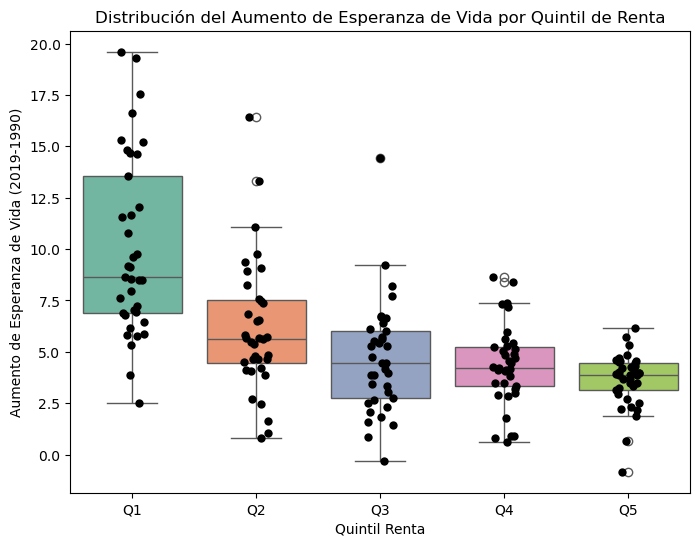

In [116]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Quintil Renta',
    y='Diferencia',
    data=df_esperanza_quintiles,
    palette='Set2'
)

sns.stripplot(
    x='Quintil Renta',
    y='Diferencia',
    data=df_esperanza_quintiles,
    color='black',
    size=6,
    jitter=True
)

plt.ylabel("Aumento de Esperanza de Vida (2019-1990)")
plt.title("Distribución del Aumento de Esperanza de Vida por Quintil de Renta")
plt.show()


Visualizamos la esperanza de vida que ha aumentado por quintiles con algunos outliers

## Paso 8: Visualizar el aumento de la esperanza de vida de los países más relevantes

In [117]:
def barplot_quintil_top50(data, **kwargs):
    # Ordenamos por 'Diferencia' descendente
    data = data.sort_values('Diferencia', ascending=False)
    # Seleccionamos el top 50%
    n = max(1, len(data)//2)  # al menos 1 país si hay pocos
    data = data.head(n)
    
    # IMPORTANTE: reset del índice
    data = data.sort_values('Diferencia', ascending=True).reset_index(drop=True)
    
    colors = sns.color_palette("Blues", n_colors=data.shape[0])
    sns.barplot(x='Diferencia', y='Country', data=data, palette=colors)
    
    # Etiquetamos solo el país con mayor aumento dentro del top 50%
    top_country = data.iloc[-1]
    plt.text(top_country['Diferencia'] + 0.2, top_country.name, top_country['Country'],
             fontsize=10, weight='bold')


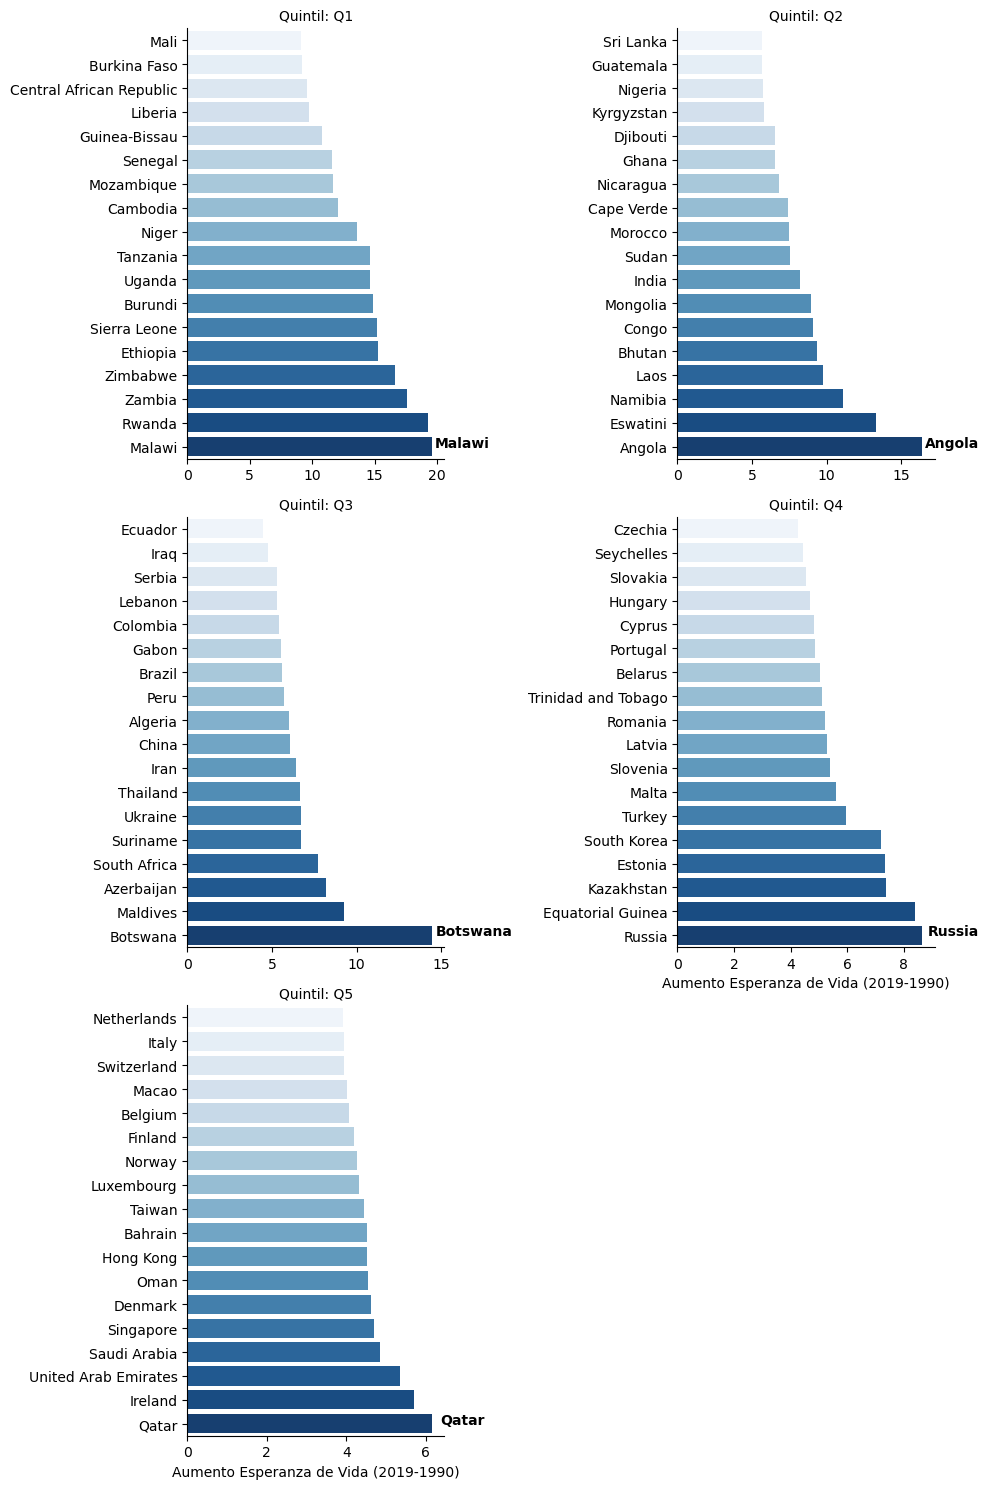

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(df_esperanza_quintiles, col="Quintil Renta", col_wrap=2, height=5, sharex=False, sharey=False)
g.map_dataframe(barplot_quintil_top50)

g.set_axis_labels("Aumento Esperanza de Vida (2019-1990)", "")
g.set_titles("Quintil: {col_name}")
plt.tight_layout()
plt.show()


## Paso 9: Visualizar países más relevantes con menor aumento de la esperanza de vida

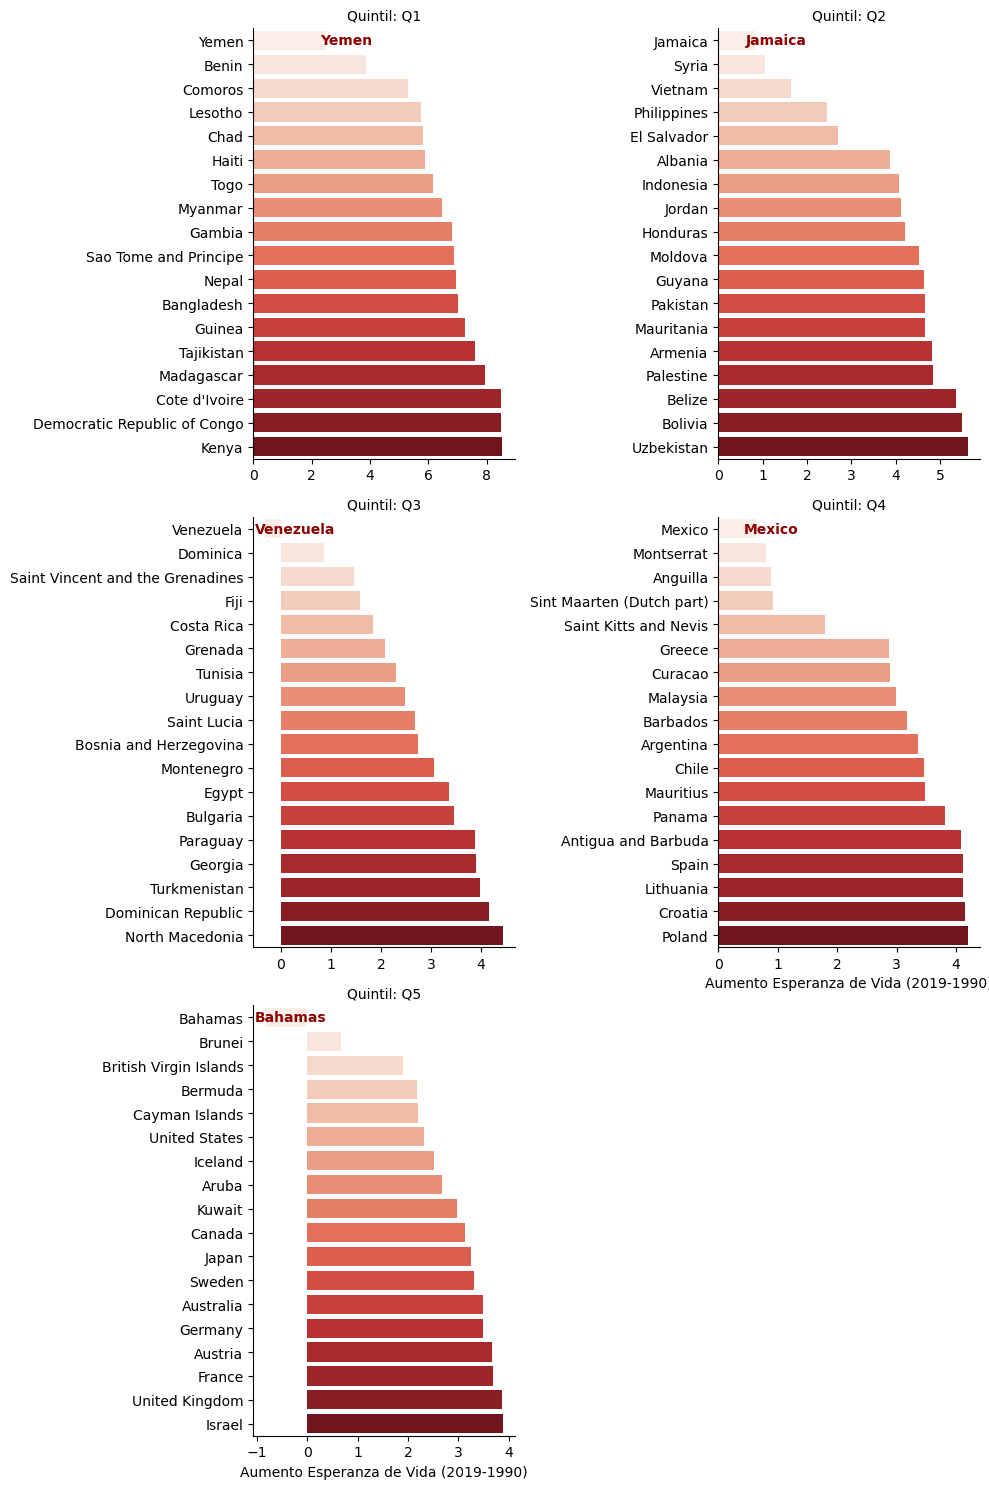

In [119]:
def barplot_quintil_bottom(data, **kwargs):
    # Ordenamos por 'Diferencia' ascendente (los que menos aumentaron o disminuyeron)
    data = data.sort_values('Diferencia', ascending=True)
    
    # Seleccionamos la mitad inferior (o al menos 1 país)
    n = max(1, len(data)//2)
    data = data.head(n)
    
    # Reset índice para que sns.barplot funcione bien
    data = data.reset_index(drop=True)
    
    # Colores: degradado rojo (para disminuciones o bajas mejoras)
    colors = sns.color_palette("Reds", n_colors=data.shape[0])
    sns.barplot(x='Diferencia', y='Country', data=data, palette=colors)
    
    # Etiquetamos el país con menor aumento
    bottom_country = data.iloc[0]
    plt.text(bottom_country['Diferencia'] - 0.2, 0, bottom_country['Country'], 
             fontsize=10, weight='bold', color='darkred', va='center')

# Importar librerías si no están ya
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos el FacetGrid por quintil
g = sns.FacetGrid(df_esperanza_quintiles, col="Quintil Renta", col_wrap=2, height=5, sharex=False, sharey=False)
g.map_dataframe(barplot_quintil_bottom)

g.set_axis_labels("Aumento Esperanza de Vida (2019-1990)", "")
g.set_titles("Quintil: {col_name}")
plt.tight_layout()
plt.show()


###  Paso 10: Análisi de correlación entre aumento de esperanza de vida y quintiles

In [120]:
df_agrupado_renta_per_capita.rename(columns={'Entity': 'Country'}, inplace=True)


In [121]:
df_esperanza_pivot = df_esperanza_pivot.reset_index()
df_esperanza_pivot

Year,Country,2000,2019,Diferencia
0,Afghanistan,55.2978,63.5645,8.2667
1,Africa,53.3498,62.6880,9.3382
2,Albania,75.4043,79.2825,3.8782
3,Algeria,70.4779,76.4742,5.9963
4,American Samoa,70.9929,72.3023,1.3094
...,...,...,...,...
252,Western Sahara,62.6686,70.3129,7.6443
253,World,66.4525,72.7897,6.3372
254,Yemen,62.5880,65.0917,2.5037
255,Zambia,45.2312,62.7926,17.5614


In [122]:
# Unimos renta y esperanza de vida
df_corr = pd.merge(
    df_agrupado_renta_per_capita[['Country', 'Renta per capita']],
    df_esperanza_pivot[['Country', 2000, 2019, 'Diferencia']],
    on='Country',
    how='inner'
)

# Renombramos columnas para claridad
df_corr.rename(columns={2000: 'Esperanza_vida_2000', 2019: 'Esperanza_vida_2019'}, inplace=True)
df_corr['Aumento_esperanza'] = df_corr['Diferencia']


In [123]:
correlacion = df_corr[['Renta per capita', 'Aumento_esperanza']].corr()
print(correlacion)


                   Renta per capita  Aumento_esperanza
Renta per capita           1.000000          -0.377772
Aumento_esperanza         -0.377772           1.000000


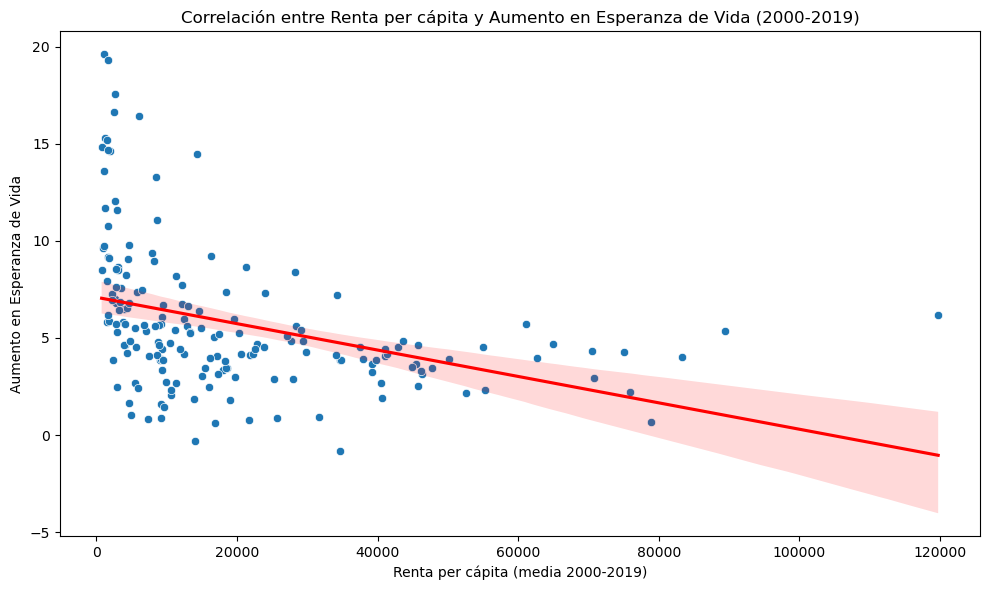

In [124]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_corr, x='Renta per capita', y='Aumento_esperanza')
sns.regplot(data=df_corr, x='Renta per capita', y='Aumento_esperanza', scatter=False, color='red')
plt.title("Correlación entre Renta per cápita y Aumento en Esperanza de Vida (2000-2019)")
plt.xlabel("Renta per cápita (media 2000-2019)")
plt.ylabel("Aumento en Esperanza de Vida")
plt.tight_layout()
plt.show()


Al analizar la relación entre la renta per cápita media (1990–2019) y el aumento en la esperanza de vida durante el mismo periodo, observamos una correlación negativa débil (r = -0.298).

Esta tendencia sugiere que, de forma general, los países con menor renta per cápita han tenido un mayor crecimiento en esperanza de vida a lo largo de las últimas décadas, mientras que los países con renta alta han mostrado mejoras más modestas o estancamiento.

Este fenómeno puede explicarse en parte porque los países con rentas bajas partían de situaciones sanitarias y sociales muy precarias en 1990, por lo que implementaciones como:

Campañas de vacunación masiva

Reducción de la mortalidad infantil

Acceso básico a servicios sanitarios

...han tenido un impacto inmediato y significativo.

En contraste, los países con renta alta ya tenían una esperanza de vida elevada, y enfrentan retos más crónicos y difíciles de reducir (como enfermedades cardiovasculares, cáncer, salud mental o envejecimiento poblacional).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

##  Conclusión : Lo interesante es profundizar porque hay países que con la misma renta su esperanza de vida ha aumentado 15 años mientras que en el mismo grupo hay algunos países que solo han incrementado 3 años